<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>

---

# Final Project 3

## Perkenalan

Teammate:
1. Nindya Eka Apsari

2. Faradilla Ardiyani


PYTN-KS002

Studi Independen - Kampus Merdeka

### Latar Belakang

Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 secara global, diperkirakan merenggut 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia. Gagal jantung adalah peristiwa umum yang disebabkan oleh CVD dan dataset ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, aktivitas fisik dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang berisiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidaemia atau penyakit yang sudah mapan) memerlukan deteksi dini dan manajemen di mana model pembelajaran mesin dapat sangat membantu.

### Dataset

Analisis ini menggunakan dataset yang bersumber dari Kaggle dengan judul ["Heart Failure Prediction"](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)


Dataset ini berisikan faktor-faktor kematian oleh gagal jantung yang memiliki 13 atribut dengan 299 rows. Atribut yang menjadi target yaitu atribut Death Event/Kematian, sedangkan atribut lainnya merupakan prediktor.

### Objektif yang ingin dicapai

Objective yang ingin dicapai dalam analisis ini yaitu:

- mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi kematian oleh penyakit gagal jantung

- dapat memprediksi kematian berdasarkan faktor-faktor yang mempengaruhinya menggunakan metode ensemble


## Import Libraries

Melakukan import libraries yang digunakan dalam project ini

In [73]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
import pickle

print('Libraries sudah siap!')

Libraries sudah siap!


## Data Loading

Melakukan loading dataset menggunakan library Pandas

In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Melakukan pengaturan yakni tidak memberi batasan maksimal kolom yang ditampilkan.

In [4]:
pd.set_option("display.max_columns", None)

Melihat 5 baris teratas dari dataset

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Melihat 5 baris terbawah dari dataset

In [6]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


Melihat informasi kolom, baris, dan data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


dataset memiliki baris yang banyak yaitu 299 baris, dan memiliki tipe data yang bervariasi yakni float dan integer.

Melihat matriks dataset dengan [.shape]()

Terlihat dataset memiliki 299 baris dan 13 kolom

In [8]:
df.shape

(299, 13)

Menggunakan [.columns]() untuk melihat rincian nama kolom yang ada

In [8]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Mengecek missing value dengan [.isnull()]() serta menjumlahkannya dengan menambah [.sum]()

In [18]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Diperoleh bahwa tidak terdapat missing value pada semua atribut.

Menggunakan [.describe()]() untuk mengecek statistik deskriptif dari masing-masing atribut yang bertipe numeric.

In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Melihat banyaknya unique values untuk tiap atribut.

In [11]:
for col in df.columns:
    print(col,': ', df[col].nunique())

age :  47
anaemia :  2
creatinine_phosphokinase :  208
diabetes :  2
ejection_fraction :  17
high_blood_pressure :  2
platelets :  176
serum_creatinine :  40
serum_sodium :  27
sex :  2
smoking :  2
time :  148
DEATH_EVENT :  2


## Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut.

Melakukan pengecekan duplikasi data.

Diperoleh tidak ada duplikasi data.

In [12]:
df.duplicated().sum()

0

Melakukan pengecekan missing value pada atribut DEATH EVENT.

Diperoleh bahwa tidak terdapat missing value.

In [13]:
df['DEATH_EVENT'].isnull().sum()

0

Melakukan crosstab atribut smoking dan Death Event

Diperoleh hasil bahwa jumlah pasien merokok yang meninggal paling sedikit dibandingkan perbandingan yang lain

([<matplotlib.axis.XTick at 0x21d9b005f08>,
 [Text(0, 0, 'Tidak Merokok'), Text(1, 0, 'Merokok')])

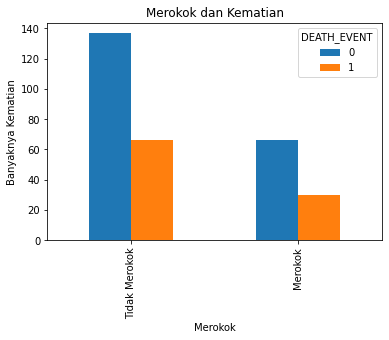

In [15]:
pd.crosstab(df.smoking, df.DEATH_EVENT).plot(kind='bar')
plt.ylabel('Banyaknya Kematian')
plt.xlabel('Merokok')
plt.title('Merokok dan Kematian')
plt.xticks(ticks=(0,1),labels=['Tidak Merokok','Merokok'])

Memberikan nama baru untuk setiap atribut.

In [14]:
df2 = df.rename(columns={'age':'Usia', 'anaemia':'Anaemia','creatinine_phosphokinase':'Kreatinin_fosfokinase', 'diabetes':'Diabetes',
                         'ejection_fraction':'Fraksi_ejeksi', 'high_blood_pressure':'Tekanan_darah_tinggi','platelets':'Platelets', 
                        'serum_creatinine':'Kreatinin_serum', 'serum_sodium':'Sodium_serum','sex':'Gender','smoking':'Perokok', 
                         'time':'Waktu', 'DEATH_EVENT':'Kematian'})

Menghilangkan atribut Waktu dikarenakan tidak relevan dengan variabel target. Waktu menunjukkan seberapa lama pasien dapat bertahan, sehingga atribut tersebut tidak cocok sebagai variabel independen, melainkan lebih cocok menjadi variabel target (untuk kasus yang lain)

In [15]:
df2.drop(columns=['Waktu'], inplace=True)

In [16]:
df2.head()

,Usia,Anaemia,Kreatinin_fosfokinase,Diabetes,Fraksi_ejeksi,Tekanan_darah_tinggi,Platelets,Kreatinin_serum,Sodium_serum,Gender,Perokok,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


Melihat banyaknya nilai dari masing-masing atribut

In [17]:
for col in df2.columns:
    print(col,': ')
    print(df2[col].value_counts())
    print("  ")
    print("  ")

Usia : 
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: Usia, dtype: int64
  
  
Anaemia : 
0    170
1    129
Name: Anaemia, dtype: int64
  
  
Kreatinin_fosfokinase : 
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: Kreatinin_fosfokinase, Length: 208, dtype: int64
  
  
Diabetes : 
0    174
1    125
Name: Diabetes, dtype: int64
  
  
Fraksi_ejeksi :

Membuat dataframe yang serupa dengan dataframe sebelumnya

In [18]:
df3 = df2.copy()

Melihat 5 baris teratas dari dataset terbaru

In [19]:
df3.head()

,Usia,Anaemia,Kreatinin_fosfokinase,Diabetes,Fraksi_ejeksi,Tekanan_darah_tinggi,Platelets,Kreatinin_serum,Sodium_serum,Gender,Perokok,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


## Exploratory Data Analysis

### Descriptive Statistics & Query

Melihat statistik descriptif pada data numerik

In [33]:
num = df3.drop(columns=['Anaemia', 'Diabetes', 'Tekanan_darah_tinggi', 'Gender', 'Perokok', 'Kematian'])
num.describe()

,Usia,Kreatinin_fosfokinase,Fraksi_ejeksi,Platelets,Kreatinin_serum,Sodium_serum
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000


Diperoleh bahwa:
- Usia rata-rata pasien yakni berkisar 60 tahun
- Rata-rata nilai kreatinin fosfokinase pada pasien yaitu 581,84
- Fraksi ejeksi maksimal yang ada pada pasien yaitu 80
- Kreatinin serum minimal yang ada pada pasien yaitu 0,5
- Sodium serum rata-rata pada pasien yaitu 136,63

Selanjutnya melihat statistik descriptif pada data kategorik

In [36]:
kat = df3.drop(columns=['Usia', 'Kreatinin_fosfokinase', 'Fraksi_ejeksi', 'Platelets', 'Kreatinin_serum', 'Sodium_serum']).astype('category')
kat.describe()

,Anaemia,Diabetes,Tekanan_darah_tinggi,Gender,Perokok,Kematian
count,299,299,299,299,299,299
unique,2,2,2,2,2,2
top,0,0,0,1,0,0
freq,170,174,194,194,203,203


Diperoleh bahwa:
- Pasien yang tidak mengidap anemia yaitu 170 pasien
- Pasien yang tidak mengidap diabetes yaitu 174 pasien
- Pasien dengan tidak mengidap tekanan darah tinggi yaitu 194 pasien
- Pasien yang tidak merokok yakni 203 pasien
- Pasien yang tidak meninggal berjumlah 203 orang

Selanjutnya, melakukan grouping pada atribut Usia dan Kematian untuk melihat rata-ratanya

In [38]:
mean1 = df3[['Usia','Kematian']].groupby('Kematian').mean().sort_values(by='Usia', ascending=True)
mean1

,Usia
Kematian,
0,58.761906
1,65.215281


Diperoleh bahwa rata-rata usia pasien yang meninggal yakni 65 tahun, sedangkan rata-rata pasien yang tidak meninggal/bertahan berusia 58 tahun

Selanjutnya, melakukan crosstab pada atribut Perokok dan Kematian untuk melihat proporsi dataset

In [38]:
pd.crosstab(df3.Perokok, df3.Kematian)

Kematian,0,1
Perokok,,
0,137,66
1,66,30


Diperoleh bahwa banyaknya kasus kematian pasien yang merokok yakni sebesar 30 pasien, sedangkan proporsi pasien yang merokok dapat bertahan dan tidak merokok namun meninggal adalah sama yakni 66 pasien. Untuk pasien yang tidak merokok dan tidak meninggal memiliki jumlah yang paling besar yakni 137 pasien

### Boxplot

Melakukan visualisasi Boxplot untuk melihat distribusi data, outlier data

C:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

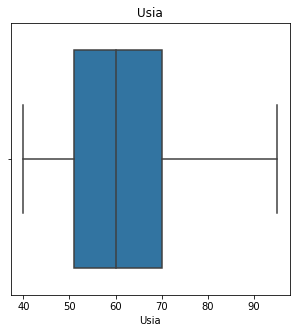

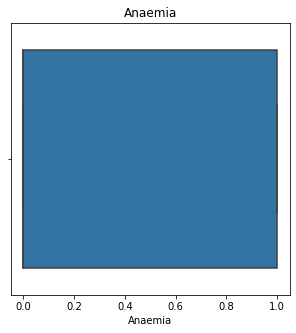

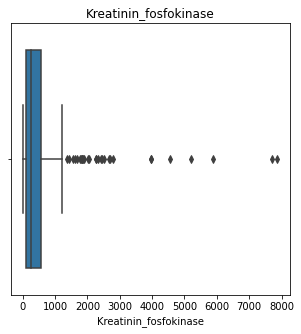

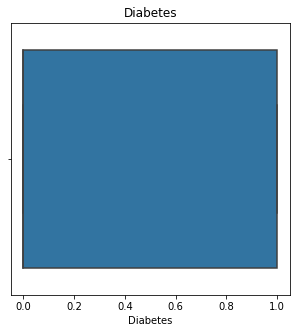

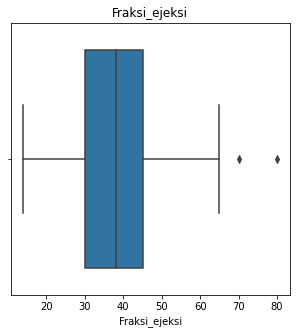

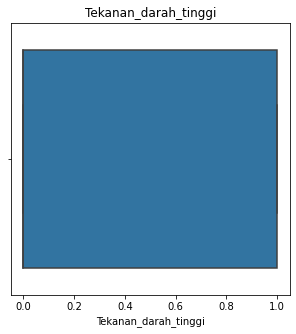

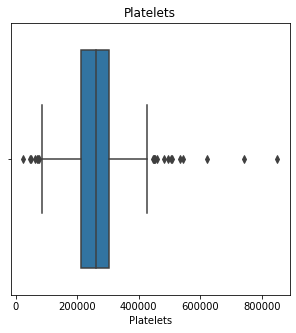

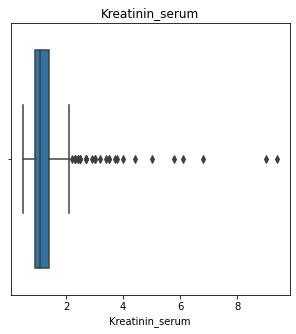

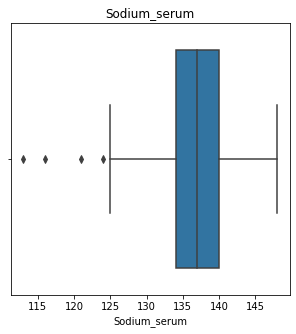

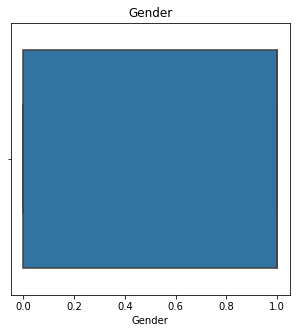

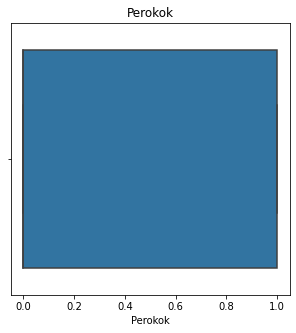

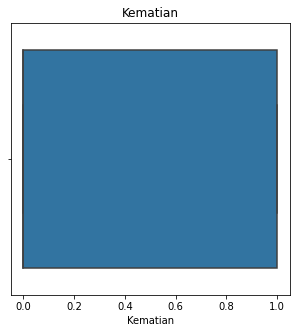

In [40]:
for feature in df3:
    plt.figure(figsize=(5,5))
    sns.boxplot(df3[feature])
    plt.title(feature)

Diperoleh bahwa masih terdapat atribut dengan nilai outlier yang banyak.

### Histogram

Selanjutnya melakukan visualisasi histogram untuk melihat proporsi data.

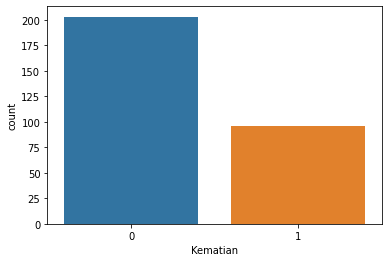

In [41]:
sns.countplot(x="Kematian", data=df3)
plt.show()

Diperoleh bahwa proporsi data antara pasien yang meninggal maupun yang tidak adalah tidak berbeda signifikan.

### Correlation Matrix

Melakukan visualisasi korelasi antar variabel untuk melihat hubungan.

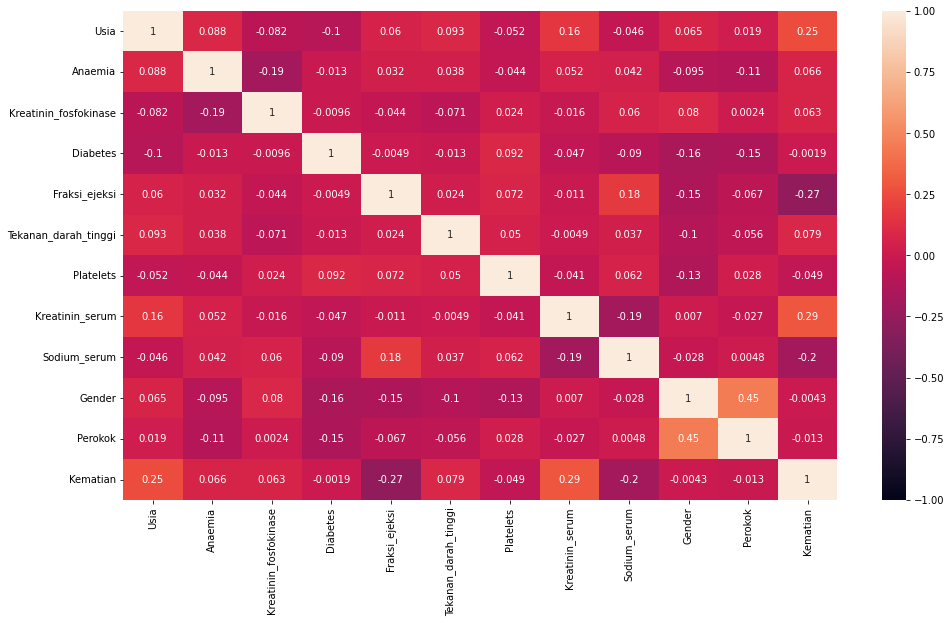

In [42]:
plt.figure(figsize=(16, 9))
sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [43]:
df3.corr()['Kematian'].sort_values(ascending=False)

Kematian                 1.000000
Kreatinin_serum          0.294278
Usia                     0.253729
Tekanan_darah_tinggi     0.079351
Anaemia                  0.066270
Kreatinin_fosfokinase    0.062728
Diabetes                -0.001943
Gender                  -0.004316
Perokok                 -0.012623
Platelets               -0.049139
Sodium_serum            -0.195204
Fraksi_ejeksi           -0.268603
Name: Kematian, dtype: float64

Diperoleh:
- Atribut yang memiliki korelasi tertinggi 4 teratas yaitu atribut kreatinin serum, usia, fraksi ejeksi, dan sodium serum
- Pada atribut fraksi ejeksi dan sodium serum memiliki korelasi negatif dengan Kematian
- Untuk atribut kreatinin serum dan usia memiliki korelasi positif dengan Kematian

## Data Preprocessing

Melakukan inisiasi variabel X dan Y

In [44]:
X = df3.drop(['Kematian'], axis=1)
y = df3['Kematian']
print(X.shape)
print(y.shape)

(299, 11)
(299,)


### Feature Selection

Melakukan feature selection menggunakan library SequentialFeatureSelector dengan Metode Rergesi Linier, banyak atribut 10, metode forward, evaluasi dengan R squared, dan cv dengan k=3.

In [45]:
et=ExtraTreesClassifier()
et.fit(X,y)

ExtraTreesClassifier()

Diperoleh hasil dengan 10 feature/atribut yang paling berpengaruh dalam model

In [46]:
et.feature_importances_

array([0.14451308, 0.03356173, 0.10852457, 0.04622997, 0.16760153,
       0.02945819, 0.10702931, 0.16867687, 0.12103371, 0.03601042,
       0.03736064])

Selain itu juga melakukan feature selection menggunakan library F regression dengan k=10

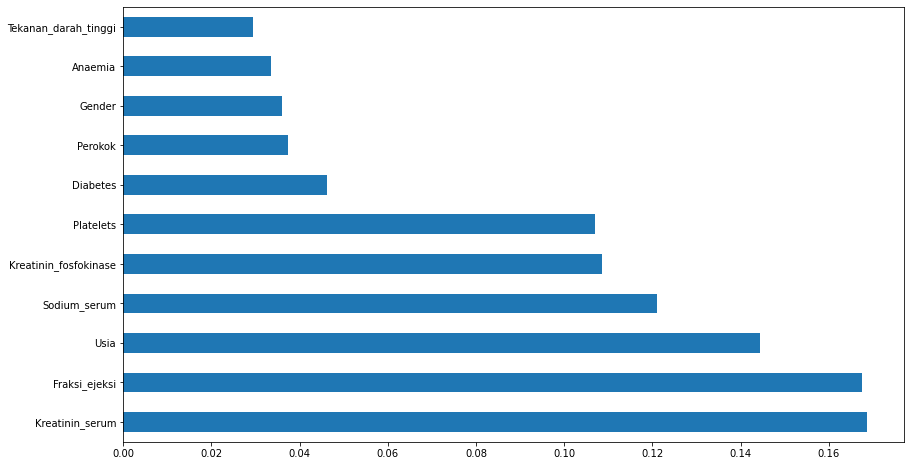

In [47]:
plt.figure(figsize=(14,8))
feat_importances=pd.Series(et.feature_importances_,index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()


Setelah diperoleh feature yang paling berpengaruh pada model, dilakukan inisiasi final pada variabel X yang akan dijadikan training.

Dalam hal ini dipilih 4 atribut yang paling berpengaruh signifikan berdasarkan kedua uji feature selection yang telah dilakukan, yakni atribut Kreatinin serum, fraksi ejeksi, usia, sodium serum

In [48]:
X_fit = df3[['Usia', 'Fraksi_ejeksi', 'Kreatinin_serum', 'Sodium_serum']]

Melihat 5 baris teratas dari dataframe X_fit

In [49]:
X_fit.head()

,Usia,Fraksi_ejeksi,Kreatinin_serum,Sodium_serum
0,75.0,20,1.9,130
1,55.0,38,1.1,136
2,65.0,20,1.3,129
3,50.0,20,1.9,137
4,65.0,20,2.7,116


Melihat rincian datafram X_fit, yakni memiliki tipe data numerik

In [50]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Usia             299 non-null    float64
 1   Fraksi_ejeksi    299 non-null    int64  
 2   Kreatinin_serum  299 non-null    float64
 3   Sodium_serum     299 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 9.5 KB


Melihat dimensi X_fit, yakni memiliki 637976 baris dan 8 atribut.

In [51]:
X_fit.shape

(299, 4)

Setelah diperoleh atribut yang akan dilakukan training, kemudian membagi data menjadi Training dan Testing dengan proporsi 0.8 dan 0.2

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X_fit, y, test_size=0.30, random_state=325)

## Model Defining

Metode pengujian pada training ini menggunakan metode random forest classifier, extra tree classifier, dan gradien boosting classifier. Alasan penggunaan metode ini yaitu tipe data prediksi yang berupa data kategorik, sehingga metode tersebut cocok digunakan.

Model pertama yakni model random forest classifier dengan n estimator 10, max depth 10, min samples split 2

In [53]:
clf1 = RandomForestClassifier(n_estimators=10, max_depth=10,min_samples_split=2, random_state=0)

Model kedua yakni model extra tree classifier dengan n estimator 10, max depth 5, min samples split 3

In [54]:
clf2 = ExtraTreesClassifier(n_estimators=10, max_depth=5, min_samples_split=3, random_state=1)

Model ketiga yakni model gradient boosting classifier dengan n estimator 100, learning rate 0.1, max depth 1

In [56]:
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                  max_depth=1, random_state=3)

## Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [82]:
model1 = clf1.fit(X_train, y_train)

In [80]:
model2 = clf2.fit(X_train, y_train)

In [81]:
model3 = clf3.fit(X_train, y_train)

## Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. 

### Random Forest Classifier

In [84]:
y_pred1 = clf1.predict(X_test)
print("Test score:", clf1.score(X_test, y_test))
print("Train score:", clf1.score(X_train, y_train))

Test score: 0.6777777777777778
Train score: 0.9712918660287081


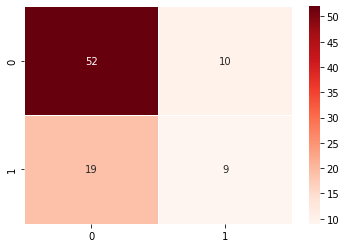

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        62
           1       0.47      0.32      0.38        28

    accuracy                           0.68        90
   macro avg       0.60      0.58      0.58        90
weighted avg       0.65      0.68      0.66        90



In [85]:
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()
print(classification_report(y_test, y_pred1))

In [86]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred1))
print('Presisi :', precision_score(y_test,y_pred1))
print('Recall :', recall_score(y_test,y_pred1))
print('F1 Score :', f1_score(y_test,y_pred1))

Ringkasan Evaluasi Model
Akurasi : 0.6777777777777778
Presisi : 0.47368421052631576
Recall : 0.32142857142857145
F1 Score : 0.3829787234042553


### Extra Tree Classifier

In [87]:
y_pred2 = clf2.predict(X_test)
print("Test score:", clf2.score(X_test, y_test))
print("Train score:", clf2.score(X_train, y_train))

Test score: 0.6666666666666666
Train score: 0.8421052631578947


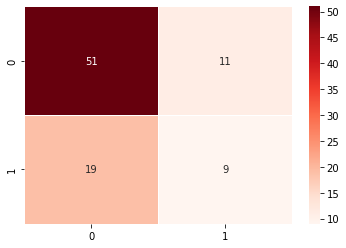

              precision    recall  f1-score   support

           0       0.73      0.82      0.77        62
           1       0.45      0.32      0.38        28

    accuracy                           0.67        90
   macro avg       0.59      0.57      0.57        90
weighted avg       0.64      0.67      0.65        90



In [88]:
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()
print(classification_report(y_test, y_pred2))

In [89]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred2))
print('Presisi :', precision_score(y_test,y_pred2))
print('Recall :', recall_score(y_test,y_pred2))
print('F1 Score :', f1_score(y_test,y_pred2))

Ringkasan Evaluasi Model
Akurasi : 0.6666666666666666
Presisi : 0.45
Recall : 0.32142857142857145
F1 Score : 0.375


### Gradient Boosting Classifier

In [90]:
y_pred3 = clf3.predict(X_test)
print("Test score:", clf3.score(X_test, y_test))
print("Train score:", clf3.score(X_train, y_train))

Test score: 0.7111111111111111
Train score: 0.8277511961722488


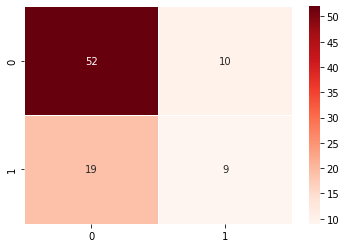

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        62
           1       0.55      0.39      0.46        28

    accuracy                           0.71        90
   macro avg       0.65      0.62      0.63        90
weighted avg       0.69      0.71      0.70        90



In [91]:
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()
print(classification_report(y_test, y_pred3))

In [92]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred3))
print('Presisi :', precision_score(y_test,y_pred3))
print('Recall :', recall_score(y_test,y_pred3))
print('F1 Score :', f1_score(y_test,y_pred3))

Ringkasan Evaluasi Model
Akurasi : 0.7111111111111111
Presisi : 0.55
Recall : 0.39285714285714285
F1 Score : 0.45833333333333337


Diperoleh bahwa:
- Model ketiga memiliki evaluasi model paling baik dibanding kedua model lainnya
- Model pertama dan kedua diindikasikan adanya overfitting
- Model yang dipilih untuk deployment yakni model ketiga

## Model Inference

Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

In [93]:
X_new = {'Usia':[50,55,60], 'Fraksi_ejeksi':[35,30,25], 'Kreatinin_serum':[1.25,2,3], 'Sodium_serum':[130,133,136]}
X_new = pd.DataFrame(X_new)

Melakukan prediksi pada data baru

In [95]:
y_pred_new = clf3.predict(X_new)
print('Prediksi Pasien yaitu: ')
print(y_pred_new)

Prediksi Pasien yaitu: 
[0 1 1]


## Conclusions

Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut:
- Terdapat 13 atribut yang diasumsikan memengaruhi tarif taksi online. Setelah dilakukan analisis, diambil 4 atribut/faktor yang paling berpengaruh dalam model.
- Faktor-faktor yang berpengaruh signifikan terhadap kematian pasien gagal jantung yaitu Usia, Fraksi Ejeksi, Kreatinin Serum, Sodium Serum.
- Model ensemble yang paling optimal yaitu model ketiga, diperoleh akurasi testing 71%.

In [96]:
pickle.dump(clf3, open('modelfp3.pkl','wb'))